# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_ind

from sklearn.impute import SimpleImputer as Imputer

# Dataset Description
This dataset is from a 2014 survey conducted by a non-profit corporation called Open Sourcing Mental Illness (OSMI) that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.


## Collection Process Description
The dataset was posted on the Kaggle website by OSMI. However, the raw dataset is also found on their website (https://osmihelp.org/research). The OSMI surveyed over 1200 respondents from different parts of the world who work in the tech industry.

Let us load the data to see how many observations are present in the dataset before being cleaned:

In [8]:
mental_health_df = pd.read_csv("Mental-Health-In-Tech-Survey.csv", skipinitialspace=True)
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Evidenced by the contents of the dataframe, there are precisely 1259 observations from the dataset, which is enough observations to conclude that the sample size is sufficiently large. Although no further information was explicitly stated about the sampling method used, other than the number of respondents who answered the survey, it is safe to assume that the observations are independent, seeing how there is a diversity regarding the observations' demographics.

## Dataset File Structure
The dataset is composed of a total of 1259 observations and 27 variables. Each row of the dataset represents a person who works in a tech company. Additionally, each column represents questions about their attitude towards mental health in a technological environment. However, we deemed that we do not need the variable "Timestamp" (with the index of 0) and the variable "comments" (with the index of 26) since we do not see the need to know the time of when they took the survey, and also the varied comments the respondents shared.

In [9]:
mental_df = mental_health_df.iloc[: , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]].copy()
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

## Variables Discussion
Before selecting the variables relevant to the case study, each observation spans 27 variables (columns). The following are the descriptions of each variable corresponding to the respondent's demographics and  mental health-related questions asked from the survey in the dataset:

- **`Timestamp`**: Time when survey started.


- **`Age`**: Age of respondent.


- **`Gender`**: Gender of respondent.


- **`Country`**: Country of origin.


- **`state`**: variable that asks the question "*If you live in the United States, which state or territory do you live in?*"


- **`self_employed`**: variable that asks the question "*Are you self-employed?*"


- **`family_history`**: variable that asks the question "*Do you have a family history of mental illness?*"


- **`treatment`**: variable that asks the question "*Have you sought treatment for a mental health condition?*"


- **`work_interfere`**: variable that asks the question "*If you have a mental health condition, do you feel that it interferes with your work?*"


- **`no_employees`**: variable that asks the question "*How many employees does your company or organization have?*"


- **`remote_work`**: variable that asks the question "*Do you work remotely (outside of an office) at least 50% of the time?*"


- **`tech_company`**: variable that asks the question "*Is your employer primarily a tech company/organization?*"


- **`benefits`**: variable that asks the question "*Does your employer provide mental health benefits?*"


- **`care_options`**: variable that asks the question "*Do you know the options for mental health care your employer provides?*"


- **`wellness_program`**: variable that asks the question "*Has your employer ever discussed mental health as part of an employee wellness program"?*"


- **`seek_help`**: variable that asks the question "*Does your employer provide resources to learn more about mental health issues and how to seek help?*"


- **`anonymity`**: variable that asks the question "*Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?*"


- **`leave`**: variable that asks the question "*How easy is it for you to take medical leave for a mental health condition?*"


- **`mental_health_consequence`**: variable that asks the question "*Do you think that discussing a mental health issue with your employer would have negative consequences?*"


- **`phys_health_consequence`**: variable that asks the question "*Do you think that discussing a physical health issue with your employer would have negative consequences?*"


- **`coworkers`**: variable that asks the question "*Would you be willing to discuss a mental health issue with your coworkers?*"


- **`supervisor`**: variable that asks the question "*Would you be willing to discuss a mental health issue with your direct supervisor(s)?*"


- **`mental_health_interview`**: variable that asks the question "*Would you bring up a mental health issue with a potential employer in an interview?*"


- **`phys_health_interview`**: variable that asks the question "*Would you bring up a physical health issue with a potential employer in an interview?*"


- **`mental_vs_physical`**: variable that asks the question "*Do you feel that your employer takes mental health as seriously as physical health?*"


- **`obs_consequence`**: variable that asks the question "*Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?*"


- **`comments`**: variable that asks the question "*Any additional notes or comments*"

After selecting only the most relevant variables to the case study, the total number of variables has been cut down from 27 to 25 variables. Those not included in the selection were the variables **`Timestamp`** and **`comments`**.

# Exploratory Data Analysis
This is the section of the notebook where the EDA is performed.

## Understanding the Data
Before we process the data, it is vital to understand the contents of the dataset. By doing this, we can figure out what each observation represents and how each variable is related to one another. Let us go ahead and look at some of the observations.

In [10]:
mental_df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [11]:
mental_df.tail()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


By looking at the two tables, each observation represents a person that works in the tech industry field. There are some important variables to note because it is the focus of the dataset, such as those related to work and mental health. This helps us get a glimpse of which values affect one another.

To do this, we need to answer some exploratory data analysis questions with variables that we have chosen from which we want to gain insight.
- How many respondents who work remotely and are diagnosed with mental health conditions have had their mental health condition interfere with work?
- What is the frequency in observing negative consequences from coworkers who have mental health conditions between the different size of companies or organizations (6-25 employees, More than 1000 employees, 26-100 employees, 100-500 employees, 1-5 employees, 500-1000 employees)?
- How many respondents feel that it is easy to take medical leave for a mental health condition if their employer takes mental health as seriously as physical health?
- Which among the size of companies or organizations (6-25 employees, More than 1000 employees, 26-100 employees, 100-500 employees, 1-5 employees, 500-1000 employees) has the highest frequency in terms of willingness to discuss a mental health issue with coworkers?
- What is the average age of employees who said yes in being willing to discuss a mental health issue with coworkers and the average age of employees who said no?

## Data Cleaning
Before we start answering our exploratory questions, we must clean the data to get accurate numerical summaries and visualizations. First, we check which variables contain **`NaN/null`** values.

In [12]:
mental_df.isnull().any()

Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
dtype: bool

In [13]:
nan_variables = mental_df.columns[mental_df.isnull().any()].tolist()
print("Columns that contain NaN/null values: ", nan_variables)

Columns that contain NaN/null values:  ['state', 'self_employed', 'work_interfere']


It is evident that the variables **`state`**, **`self_employed`**, and **`work_interfere`** contain one or more **`NaN/null`** values. However, let us check each of the variables' unique values to see which variable may need to be cleaned.

In [14]:
for column in mental_df:
    print("Unique values for '{}' column:\n".format(column), mental_df[column].unique())
    print("")

Unique values for 'Age' column:
 [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

Unique values for 'Gender' column:
 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agend

Based on the results from the `unique` function being performed, variables **`Age`**, **`Gender`**, **`state`**, **`self_employed`**, **`coworkers`**, and **`work_interfere`** need to be cleaned. First, let us clean the variables with **`NaN`** values, specifically the variables **`state`**, **`self_employed`**, and **`work_interfere`**.

In [15]:
nan_variables = mental_df.columns[mental_df.isnull().any()].tolist()

for nan in nan_variables:
    print(nan, sum(mental_df[nan].isnull()))

state 515
self_employed 18
work_interfere 264


There are a significant amount of null values in each of the variables. Instead of removing these observations from the dataset, a sentinel value will be applied to identify these observations. 
These **`NaN/null`** values will now be set to a sentinel value for string columns.

In [16]:
mental_df.loc[mental_df['work_interfere'].isnull(),'work_interfere'] = "Not stated"
mental_df.loc[mental_df['self_employed'].isnull(),'self_employed'] = "Not stated"

The group deemed that the most appropriate sentinel values for these variables is **"not stated"** since the respondents may not have answered because the question was not relevant to them or because they were unwilling to share the information.

In [17]:
print("Countries with NaN Values:\n", mental_df['Country'].loc[(mental_df['state'].isnull())].unique())

print("\nStates from United States as country of Origin:\n", mental_df.loc[mental_df.Country == 'United States', 'state'].unique())

Countries with NaN Values:
 ['Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal' 'Netherlands'
 'United States' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']

States from United States as country of Origin:
 ['IL' 'IN' 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' nan 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


In [18]:
mental_df.loc[mental_df['state'].isnull(),'state'] = "Not stated"

Based on the function's result, we can see that countries that answered **`NaN`** for states are countries outside the United States; however, we can also see that the United States is also present in the array. For this reason, we deemed that it is not appropriate to replace the **`NaN`** value with the string **"N/A"**, but instead be replaced with **"Not stated."**

Let us take a look at the age values again by using the `unique` function.

In [19]:
print(mental_df['Age'].unique())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


Since there are ages that do not seem faithful, we must assign them to a default or sentinel value. We have decided that it is most appropriate to set a sentinel value of **-1** to the ages, for now, so that it will be easy to identify these values when we will remap them to the average age of the whole dataset.

In [20]:
mental_df.at[mental_df['Age'] == 99999999999, 'Age'] = -1
mental_df.at[mental_df['Age'] == -1726, 'Age'] = -1
mental_df.at[mental_df['Age'] == 329, 'Age'] = -1
mental_df.at[mental_df['Age'] == -29, 'Age'] = 29
mental_df.at[mental_df['Age'] == -11, 'Age'] = -1
mental_df.at[mental_df['Age'] == 5, 'Age'] = -1
mental_df.at[mental_df['Age'] == 8, 'Age'] = -1
mental_df.at[mental_df['Age'] == 11, 'Age'] = -1

The sentinel value has been assigned to the values that needed to be cleaned. For the age **-29**, we decided to convert it instead to a positive value since we believe it might have been a typographical error.

After assigning the unfaithful values to the sentinel value, we will now apply numerical imputation. We decided not to drop these values because, seeing how mental health is a sensitive topic, the respondents may not have been willing to share their real ages. For the sake of this dataset, we will use the average of the ages to replace these sentinel values. We can use the `Imputer` function from *scikit-learn*, a machine learning library for data science in Python. 

Let us first count the number of sentinel values in the **`Age`** variable.

In [21]:
print(mental_df[mental_df['Age'] == -1].Age.count())

7


We have replaced seven observations with the sentinel value. We should now apply the **`Imputer`** function to the **`Age`** variable.

In [22]:
print("Unique values for 'Age' column:\n", mental_df['Age'].unique())

Unique values for 'Age' column:
 [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 -1 55 48 20 57 58 47 62 51 65 49 53 61 72]


In [23]:
mean_imputer = Imputer(missing_values=-1, strategy='mean')
mental_df['Age'] = mean_imputer.fit_transform(mental_df[['Age']]).ravel()
mental_df['Age'] = mental_df['Age'].astype(int)

In [24]:
print("Unique values for 'Age' column:\n", mental_df['Age'].unique())

Unique values for 'Age' column:
 [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


When we recall the **`unique`** function, we can see that the sentinel values have successfully been assigned to the **`Age`** variable's mean value.

Let us now take a look at the gender variable using the **`unique`** function.

In [25]:
print("Unique values for 'Gender' column:\n", mental_df['Gender'].unique())

Unique values for 'Gender' column:
 ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


It is evident from the result that we need to also clean the **`Gender`** variable because of its inconsistencies with the formatting. Since several observations contained typographical errors in the `Gender` column, we remapped them to their correct spellings. Moreover, considering there are different gender identities, they were placed on the 'other gender' category while maintaining male and female as the other two categories. There are three categories, the heteronormative standard and the inclusivity of gender and sexual diversity.

In [26]:
mental_df['Gender'] = mental_df['Gender'].map({'male' : 'male', 'm' : 'male', 'M' : 'male', 'Male' : 'male', 'Male-ish': 'male', 'something kinda male?': 'male',
'Cis Male' : 'male', 'cis male' : 'male', 'Male (CIS)' : 'male', 'Make' : 'male', 'Man' : 'male', 'Malr' : 'male', 'ostensibly male, unsure what that really means' : 'male', 'Mail' : 'male', 'Guy (-ish) ^_^' : 'male', 'msle' : 'male', 'something kinda male?' : 'male', 'Mal' : 'male', "maile" : 'male', "Female (trans)" : "female", "cis-female/femme" : "female", "femail" : "female", "Cis Female" : "female", 'A little about you' : 'other gender', "p" : 'other gender', 'Enby' : "other gender", 'Trans-female' : 'female', 'queer' : "other gender", "male leaning androgynous" : "other gender", "agender" : "other gender", "Agender" : "other gender", 'Neuter' : 'other gender', 'non-binary' : 'other gender', 'queer/she/they' : 'other gender', 'All' : 'other gender', 'fluid' : "other gender", 'Femake' : 'female', 'Trans woman' : 'female', "Androgyne" : "other gender", 'Genderqueer' : 'other gender', 'Nah' : 'other gender', 'female' : 'female', 'f': 'female', 'F': 'female', 'Female  ' : 'female', 'Female': 'female', 'Woman' : 'female', 'Male ' : 'male', 'male' : 'male', 'Male ' : 'male', ' F' : 'female', ' F' : 'female', 'Cis Man' : 'male', 'woman' : 'female', 'Female (cis)' : 'female', 'Female ' : 'female'})

In [27]:
print("Unique values for 'Gender' column:\n", mental_df['Gender'].unique())

Unique values for 'Gender' column:
 ['female' 'male' 'other gender']


Upon checking the dataset's unique values, we have successfully remapped all genders down to the three categories previously mentioned.

There are some variables that we would be remapping to answer the EDA questions correctly. One of which will be the **`work_interfere`** variable. Let us take a look at the unique values of **`work_interfere`**.

In [28]:
print("Unique values for 'work_interfere' column:\n", mental_df['work_interfere'].unique())

Unique values for 'work_interfere' column:
 ['Often' 'Rarely' 'Never' 'Sometimes' 'Not stated']


The **`work_interfere`** variable originally asks if the respondent has a mental health condition, and if so, do they feel that it interferes with their work. Since it has varied answers, we will map the answers **"Often"**, **"Rarely"**, and **"Sometimes"** to **"yes"**, **"Never"** to **"no"**, and retain the **"Not stated."** This is done to answer the first EDA question because we are ultimately concerned about the number of people who have had their mental health condition interfere with their work regardless of how frequently they are interfered by their condition.

In [29]:
mental_df['work_interfere'] = mental_df['work_interfere'].map({'Often': 'yes', 'Rarely': 'yes', 'Sometimes': 'yes',
                                                               'Never': 'no', 'Not stated': 'Not stated'})

In [30]:
print(mental_df['work_interfere'].unique())

['yes' 'no' 'Not stated']


Lastly, we will do the same for the `coworkers` variable.  Before remapping, let us take a look at the unique values of `coworkers`.

In [31]:
print(mental_df['coworkers'].unique())

['Some of them' 'No' 'Yes']


We will map the answer, **"Some of them"**, to **"yes."** We will be doing this since we will utilize this variable more than once for the EDA questions and research questions. We will do this since we believe that the respondent still shows a willingness to discuss mental health issues, even if it is only with specific coworkers.

In [32]:
mental_df['coworkers'] = mental_df['coworkers'].map({'Yes': 'yes', 'No': 'no', 'Some of them': 'yes'})

In [33]:
print(mental_df['coworkers'].unique())

['yes' 'no']


Upon checking for the unique values in this variable, we have successfully mapped the responses.

Let us check again if there are still any **`NaN`** values to be cleaned.

In [34]:
mental_df.isnull().any()

Age                          False
Gender                       False
Country                      False
state                        False
self_employed                False
family_history               False
treatment                    False
work_interfere               False
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
dtype: bool

After replacing missing values with a default value, remapping some values, there are no more **`NaN/null`** values in the dataset. It is safe to proceed with answering the EDA questions and research questions. 

## Data Visualization and Findings

Let us start answering our exploratory questions. For reference, these are the EDA questions formulated:
- How many respondents who work remotely and are diagnosed with mental health conditions have had their mental health condition interfere with work?
- What is the frequency in observing negative consequences from coworkers who have mental health conditions between the different size of companies or organizations (6-25 employees, More than 1000 employees, 26-100 employees, 100-500 employees, 1-5 employees, 500-1000 employees)?
- How many respondents feel that it is easy to take medical leave for a mental health condition if their employer takes mental health as seriously as physical health?
- Which among the size of companies or organizations (6-25 employees, More than 1000 employees, 26-100 employees, 100-500 employees, 1-5 employees, 500-1000 employees) has the highest frequency in terms of willingness to discuss a mental health issue with coworkers?
- What is the average age of employees who said yes in being willing to discuss a mental health issue with coworkers and the average age of employees who said no?

### EDA Question 1

Firstly, let us see how many respondents who work remotely and are diagnosed with mental health conditions have had their mental health condition interfere with work. 

Before computing the number of respondents, let us see the unique values of the variables we will work with to answer the question.

In [35]:
print("Unique values for 'remote_work':\n", mental_df['remote_work'].unique())
print("\nUnique values for 'work_interfere':\n", mental_df['work_interfere'].unique())

Unique values for 'remote_work':
 ['No' 'Yes']

Unique values for 'work_interfere':
 ['yes' 'no' 'Not stated']


For reference, **`remote_work`** is a variable that asks if a respondent works remotely (outside of an office) at least 50% of the time, while **`work_interfere`** is a variable that asks if the mental health condition of a respondent interferes with work.

Before answering the question, let us get a general overview of our variables by grouping them and counting their responses accordingly.

In [36]:
remote_interfere = mental_df.groupby("work_interfere")["remote_work"].value_counts()
reminter_table = pd.DataFrame([remote_interfere["yes"], remote_interfere["no"], remote_interfere["Not stated"]], index = ["Has Interfered", "Has not Interfered", "Did not state an answer"]).transpose()

reminter_table

,Has Interfered,Has not Interfered,Did not state an answer
remote_work,,,
No,534,157,192
Yes,248,56,72


Since we have remapped the previous values to the new values in the data cleaning portion of the dataset, we can see from the table the number of people who work remotely at least 50% of the time and those who have had their mental illness interfere with work at least once.

The table shows a total number of **248** respondents who work remotely at least 50% of the time who have mental health conditions that have had their mental health condition interfere with their work. Let us now visualize the graph to see its difference between those who have said it never interfered with them and those who have not stated any answers.

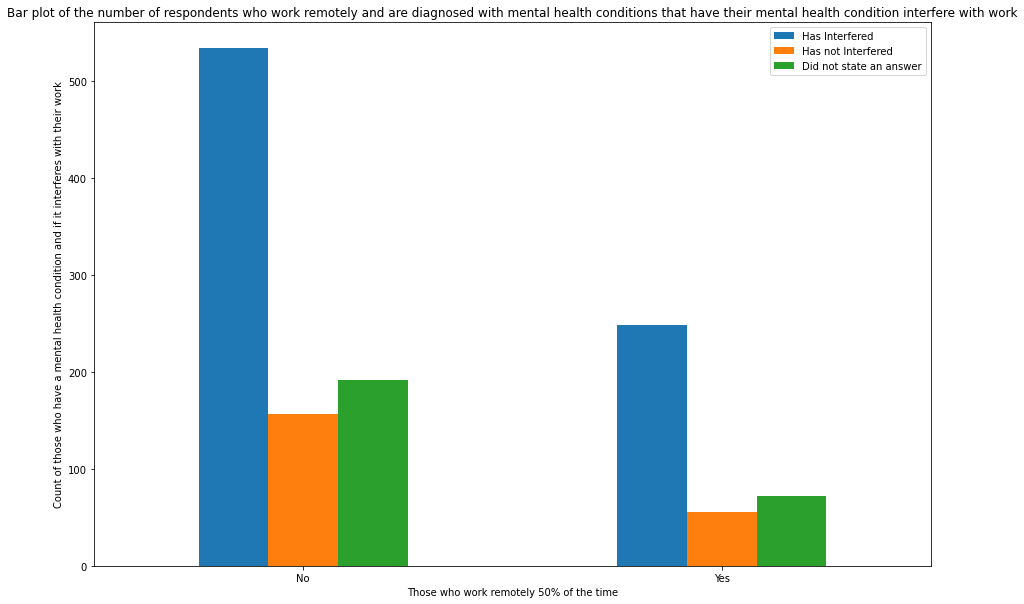

In [37]:
reminter_table.plot.bar(figsize = (15,10))
plt.xticks(rotation=0)
plt.xlabel("Those who work remotely 50% of the time")
plt.ylabel("Count of those who have a mental health condition and if it interferes with their work")
plt.title("Bar plot of the number of respondents who work remotely and are diagnosed with mental health conditions that have their mental health condition interfere with work")
plt.show()

A bar plot is used to see and compare the number between groups who have had their mental health interfere with their work, those who did not experience it interfere, and those who did not state their response. There are more respondents who work remotely (blue) and have had their mental health condition interfere with their work than those who work remotely and ***have not*** had their mental health condition interfere with their work or have not stated any answer. This is an interesting observation since most of those who work remotely have had their mental health condition interfere with their work at least once. The same could also be said to those working in the office with coworkers (those who answered ***no*** to working remotely at least 50% of the time).

### EDA Question 2

Let us now answer the second question, which is "what is the frequency in observing negative consequences from coworkers who have mental health conditions between the different size of companies or organizations (6-25 employees, More than 1000 employees, 26-100 employees, 100-500 employees, 1-5 employees, 500-1000 employees)?"

To answer this question, let us first examine the unique values of the variables we will be working with once again. 

In [38]:
print("Unique values for 'no_employees':\n", mental_df['no_employees'].unique())
print("\n\nUnique values for 'obs_consequence':\n", mental_df['obs_consequence'].unique())

Unique values for 'no_employees':
 ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


Unique values for 'obs_consequence':
 ['No' 'Yes']


The variable **`no_employees`** asks the question of how many employees does the respondent have in their company or organization, while **`obs_consequence`** asks the respondent if they have heard or observed negative consequences for coworkers with mental health conditions in their workplace.

To get the frequency in observing negative consequences from coworkers who have mental health conditions between the different sizes of companies, we will group them into their respective groups using the `groupby`, and `value_counts` functions transposing the result to understand the table better.

In [39]:
employees_consequence = mental_df.groupby("obs_consequence")["no_employees"].value_counts()
empcons_table = pd.DataFrame([employees_consequence["Yes"], employees_consequence["No"]], index = ["Has Observed Negative Consequences", "Has not Observed Negative Consequences"]).transpose()
empcons_table

,Has Observed Negative Consequences,Has not Observed Negative Consequences
More than 1000,52,230
26-100,40,249
1-5,32,130
6-25,26,264
100-500,25,151
500-1000,9,51


Based on the results, the frequency of observing negative consequences from companies or organizations are the following:
* 52 for companies or organizations with more than 1000 employees
* 40 for companies or organizations with 26-100 employees is 40
* 32 for companies or organizations with 1-5 employees
* 26 for companies or organizations with 6-25 employees
* 25 for companies or organizations with 100-500 employees
* 9 for companies or organizations with 500-1000 employees

It is worth noting that the number of observations for the employee population varies per group. However, we can observe that across all the groups, most of the observations state that they have not heard or observed negative consequences for coworkers with mental health conditions in their workplace. Let us use a bar graph to compare both of these values. We will use a bar graph once again since it is the best graph to visualize the numerical summaries.

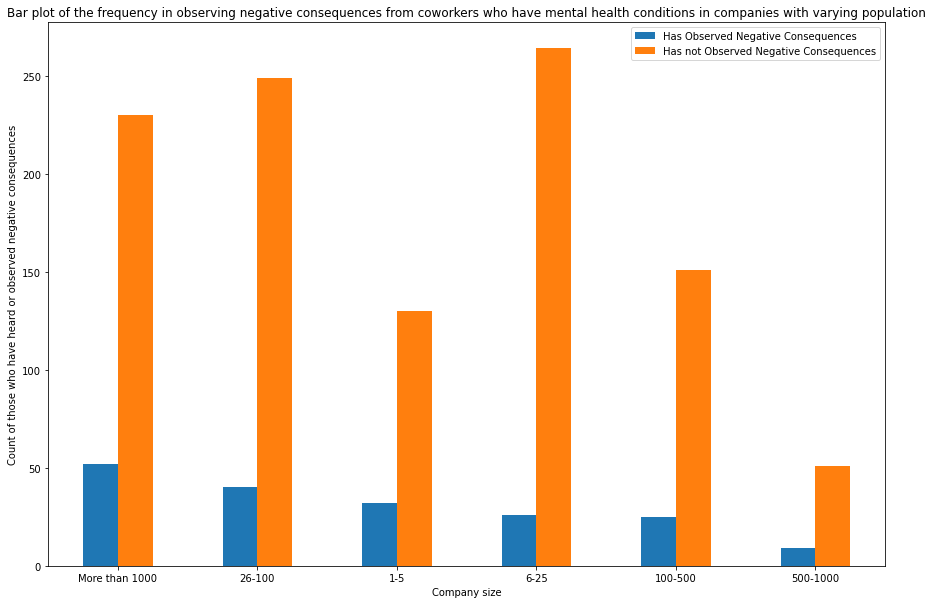

In [40]:
empcons_table.plot.bar(figsize = (15,10))
plt.xlabel("Company size")
plt.xticks(rotation=0)
plt.ylabel("Count of those who have heard or observed negative consequences")
plt.title("Bar plot of the frequency in observing negative consequences from coworkers who have mental health conditions in companies with varying population")
plt.show()

The graph shows that the majority of the respondents, regardless of their companies' size, did not observe negative consequences for coworkers with mental health conditions.

### EDA Question 3

Let us answer the next question: "how many respondents feel that it is easy to take medical leave if their employer takes mental health as seriously as physical health?" Let us take a look at the unique values of the variables we will be dealing with.

In [41]:
print("Unique values for 'leave':\n", mental_df['leave'].unique())
print("\n\nUnique values for 'mental_vs_physical':\n", mental_df['mental_vs_physical'].unique())

Unique values for 'leave':
 ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']


Unique values for 'mental_vs_physical':
 ['Yes' "Don't know" 'No']


The variable **`leave`** asks how easy it is for the respondent to take a medical leave for a mental health condition, while the variable **`mental_vs_physical`**" asks if the respondents feel that their employer takes mental health as seriously as physical health. 

To get the number of respondents that feel it is easy to take medical leave if their employer takes mental health as seriously as physical health, let us create another table that displays the respondents' responses.

In [42]:
leave_phys = mental_df.groupby("mental_vs_physical")["leave"].value_counts()
leave_phys_table = pd.DataFrame([leave_phys["Yes"], leave_phys["No"], leave_phys["Don't know"]], index = ["Employer Takes Mental Health as Seriously as Physical Health", "Employer Does not take Mental Health as Seriously as Physical Health", "Does not Know"]).transpose()
leave_phys_table

,Employer Takes Mental Health as Seriously as Physical Health,Employer Does not take Mental Health as Seriously as Physical Health,Does not Know
Very easy,125,23,58
Somewhat easy,93,50,123
Don't know,91,132,340
Somewhat difficult,23,68,35
Very difficult,11,67,20


Since we want to find out how many respondents feel that it is easy to take medical leave for their mental health condition if their employer takes mental health as seriously as physical health, we will be adding the number of people who said **"yes"** for the categories **"Very easy"** and **"Somewhat easy."** Therefore, a total number of **218** respondents feel that it is easy to take medical leave if their employer takes mental health as seriously as physical health. It is also worth noting that there are still a substantial number of those who do not know if their employer takes mental health as seriously as physical health and at the same time do not know if it is easy to take a medical leave.

Let us visualize the results to see the difference. A bar plot is the most appropriate to visualize the results.

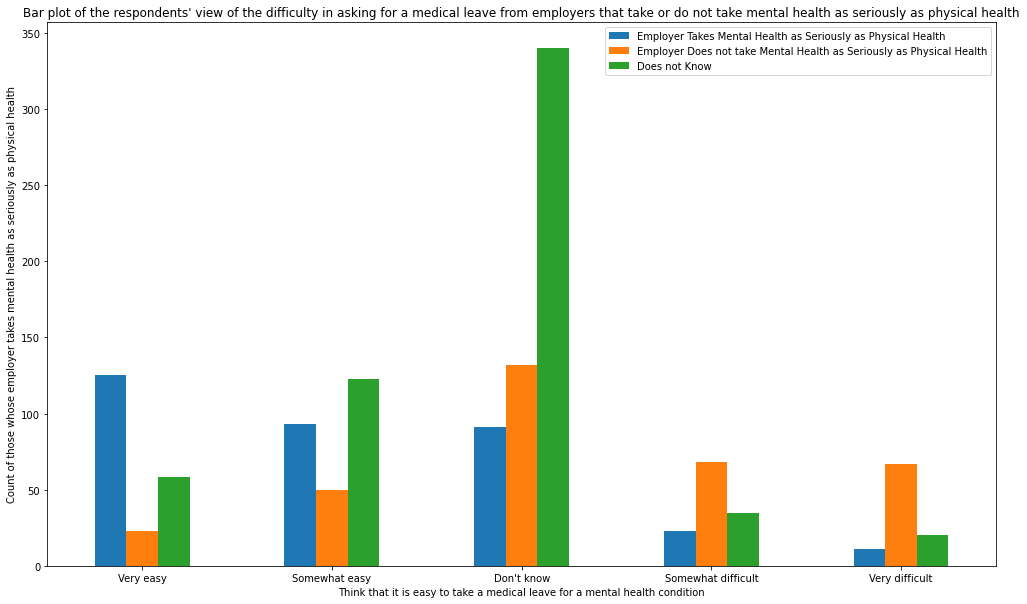

In [43]:
leave_phys_table.plot.bar(figsize=(17,10))
plt.xticks(rotation=0)
plt.xlabel("Think that it is easy to take a medical leave for a mental health condition")
plt.ylabel("Count of those whose employer takes mental health as seriously as physical health")
plt.title("Bar plot of the respondents' view of the difficulty in asking for a medical leave from employers that take or do not take mental health as seriously as physical health")
plt.show()

It is evident from the graph that there are a substantial number of those who do not know if their employer takes mental health as seriously as physical health and who do not know if it is easy to take medical leave for a mental health condition. This is still true even if answers from the categories "Very easy" and "somewhat easy" are combined.

### EDA Question 4 

Let us answer the fourth EDA question. Which among the size of companies or organizations (6-25 employees, More than 1000 employees, 26-100 employees, 100-500 employees, 1-5 employees, 500-1000 employees) has the highest frequency in terms of willingness to discuss a mental health issue with coworkers? To answer this, we check which values in the **`no_employees`** and **`coworkers`** variables appear most often.

In [44]:
num_employees_stats = mental_df['no_employees'].describe()
willing_stats = mental_df['coworkers'].describe()
pd.merge(num_employees_stats, willing_stats, left_index=True, right_index=True)

,no_employees,coworkers
count,1259,1259
unique,6,2
top,6-25,yes
freq,290,999


From the table above, we can see that the occurrence of **"6-25"** is the most in the **`no_employees`** variable with a frequency of 290 out of 1259 observations. In the **`coworkers`** variable, the value **"yes"** appeared the most with a frequency of 999 out of 1259 observations. Now let us check the frequency of those who answered the most occurring response in both variables.

In [45]:
union = mental_df[(mental_df['no_employees'] == '6-25') & (mental_df['coworkers'] == 'yes')]
print(len(union), "observations")

238 observations


We can see that there are **238 observations** that have answered the most occurring response in both variables. Let us compare and contrast how other groups look like with a bar graph.

In [87]:
empGroup_willing = mental_df.loc[:,['no_employees', 'coworkers']]
df = empGroup_willing.value_counts().unstack()
ax = df.plot(figsize=(20,10), kind='bar')

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
            '%d' % int(height),
            ha='center', va='bottom')

plt.title('Bar plot of number of employees and willingness to talk about mental health issues with coworkers')
plt.xlabel('Number of employees')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['No', 'Yes'], bbox_to_anchor = (1.04,1), loc="upper left", title='Are you willing to talk about mental health issues with coworkers?')

plt.show()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

We can see from the graph that most of the respondents, regardless of the number of employees a company or organization has, are willing to discuss a mental health issue with a coworker.

### EDA Question 5

The final EDA question is "what is the average age of employees who said **"yes"** in being willing to discuss a mental health issue with coworkers and the average age of employees who said **"no"**?" To answer this, we get the mean of the **`age`** variable of those who said **"yes"** in the `coworkers` variable, as well as those who said **"no"**.

We can use a boxplot to quickly visualize the distribution of data, identify outliers and strong associations with the data provided.

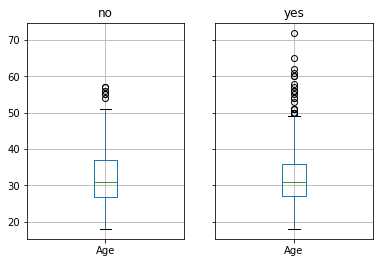

In [41]:
mental_df.groupby('coworkers').boxplot(column='Age')
plt.show()

We can check the summary statistics between the two groups.

In [42]:
summary_stat = mental_df.groupby('coworkers').agg({'Age': ['mean', 'median', 'std']})
summary_stat

Age                 
                mean median       std
coworkers                            
no         32.273077     31  7.898881
yes        32.022022     31  7.094800

Based on the summary statistics, the average age of those willing to discuss mental health issues is **32.02**, while those who are not willing are slightly older, with an age of **32.27**.

# Research Question

Based on the exploratory data analysis, we have formulated our research questions:
- Is there a statistical difference in the willingness of the employees to discuss a mental health issue with their coworkers between the different size of companies?
- Is there a difference between the average age of employees who said YES in being willing to discuss a mental health issue with coworkers and those who said NO?

The first research question's importance is to see if a company's size can impact a person's willingness to discuss a mental health issue with a coworker. From personal experiences, it often helps to discuss a mental health issue with someone else. But if a diverse set of people does not surround someone, it would usually be hard to choose someone you are willing to discuss a sensitive topic with, such as mental health issues. Thus, by answering this research question, we can see what it is like in the tech workplace; if there is a difference in employees' willingness to discuss a mental health issue with their coworkers between the different size of companies. 

The second research question's importance is to check whether an age difference plays a role in a person's attitude towards subjects pertaining to mental health. In previous experiences and notions, the older generation tends to be more conservative while the younger generation seems to be more open. Knowing the answer to this question can give us an idea of people's attitudes in the tech industry when it comes to discussing a mental health issue with a coworker. 

These questions are relevant for the Computer Science community since we will soon be working in a tech workplace. Knowing the answers to these questions provides a glimpse of the attitudes of those currently working in the tech industry and realize whether there is a need to improve the status quo.

## Data Modelling

### Research Question 1

Let us answer the first research question, "is there a statistical difference in the willingness of the employees to discuss a mental health issue with their coworkers between the different size of companies?"

The variables that will be used are as follows:
- **coworkers** Indicates the willingness of the employee to talk about a mental health issue to their coworkers
- **no_employees** The population of the employees in the company
- 0 indicates No
- 1 indicates Yes

In [43]:
mental_df.at[mental_df["coworkers"] == "no", 'coworkers'] = 0
mental_df.at[mental_df["coworkers"] == "yes", 'coworkers'] = 1

counts = mental_df.groupby("coworkers")["no_employees"].value_counts()
counts

coworkers  no_employees  
0          More than 1000     82
           26-100             52
           6-25               52
           1-5                30
           100-500            30
           500-1000           14
1          6-25              238
           26-100            237
           More than 1000    200
           100-500           146
           1-5               132
           500-1000           46
Name: no_employees, dtype: int64

#### Inference Utilizing Chi-Square Test

To determine whether there is a statistical significance in the number of coworkers and the respective respondents' willingness to discuss a mental health issue with a coworker, we will be using the Chi-Square test on two categorical variables: **`coworkers`** and **`no_employees`**

The chosen significance level (α) is 0.05.

In [44]:
sig_level = 0.05

These are our respective hypotheses:

$H_0$ (null hypothesis): There is no statistical difference in the willingness of the employees to discuss a mental health issue with their coworkers between the different size of companies

$H_A$ (alternative hypothesis): There is a statistical difference in the willingness of the employees to discuss a mental health issue with their coworkers between the different size of companies

In [45]:
table = pd.DataFrame([counts[0], counts[1]], index=["no", "yes"]).transpose()
table

,no,yes
More than 1000,82,200
26-100,52,237
6-25,52,238
1-5,30,132
100-500,30,146
500-1000,14,46


Let us compute the $p$-value.

In [46]:
test_stat, p_value, DoF, exp_values = chi2_contingency(table)
chi2_contingency(table)

(16.885574029568957,
 0.0047220000776374265,
 5,
 array([[ 58.23669579, 223.76330421],
        [ 59.68228753, 229.31771247],
        [ 59.88880064, 230.11119936],
        [ 33.45512311, 128.54487689],
        [ 36.34630659, 139.65369341],
        [ 12.39078634,  47.60921366]]))

In [47]:
print('{:.2f}'.format(test_stat))
print('{:.4f}'.format(p_value))
print('{:.2f}'.format(DoF))

16.89
0.0047
5.00


- The **Test statistic** is **16.89**
- The **P value** is **0.0047** (in 4 decimal places)
- The **degrees of freedom (DoF)** is **5**

In [49]:
if p_value <= sig_level:
    print('Reject the Null Hypothesis (H0)')
else:
    print('Fail to reject the Null Hypothesis (H0)')

Reject the Null Hypothesis (H0)


### Conclusion and Insights for Research Question 1

Since the $p$-value **0.0047**  is **less than** the significance level **0.05**, **reject the null hypothesis** under a significance level of 5%, suggesting that there is strong enough evidence that there is a statistical difference in the willingness of the employees to discuss a mental health issue to their coworkers between the different size of companies.

We cannot say that this difference makes the employees more willing to discuss a mental health issue with their coworkers between the different size of companies because the statistics only prove that there is a significant difference in the willingness of the employees to discuss a mental health issue to their coworkers between the different size of companies. 

While there is a statistical difference, it is still important to note that there is not much data to prove whether the companies' varying size affects or influences the respondent's decision to open up or socialize to their peers or coworkers about mental health. Albeit, all of the population groups had relatively higher frequencies of responses 'yes' over 'no' in a question of whether they were willing to talk about a mental health issue to a coworker or not. This can be a useful insight for future related literary materials regarding mental health in the tech workplace.

### Research Question 2

The second research question is "is there a difference between the average age of employees who said **"yes"** in being willing to discuss a mental health issue with coworkers and those who said **"no"**?". From a previous EDA question, there was a slight difference in the average age between those who said **"yes"**, and those who said **"no"**. We want to find out if this statistically significant, so we will conduct a hypothesis test.

The chosen significance level (α) is 0.05

Based on the sample, the difference in the means of the age for those who said **"yes"** and for those who said **"no"** is:

In [50]:
yes_mean = mental_df[mental_df['coworkers'] == 1].Age.mean()
no_mean = mental_df[mental_df['coworkers'] == 0].Age.mean()
difference = abs(yes_mean-no_mean)
print('{:.2f}'.format(difference))

0.25


#### Independent T-test in Comparing Two Different Means

These are our respective hypotheses:

$H_0$ (null hypothesis): The true difference is 0

$H_A$ (alternative hypothesis): The true difference is not 0

We can use the independent $t$-test to compare the two average ages from the unpaired groups. Using the $t$-test assumes the Null Hypothesis states that the difference between the two means is 0, while the Alternative Hypothesis states that the difference between the two means is not 0.

In [51]:
ttest_ind(mental_df[mental_df["coworkers"] == 1]["Age"],
          mental_df[mental_df["coworkers"] == 0]["Age"],
          equal_var = False)

Ttest_indResult(statistic=-0.4659105230134945, pvalue=0.6415501187332883)

### Conclusion and Insights for Question 2

Since the $p$-value is 0.64, do not reject the null hypothesis under a significance level of 5%, suggesting that there is not enough evidence of a difference between the average age of employees who said "yes" in being willing to discuss a mental health issue with coworkers and those who said "no."

In other words, we cannot say that there is a difference in the average of employees who are willing to discuss a mental health issue and those who are not willing since there is insufficient evidence to support the alternative hypothesis. The average age of those who said NO and the average of those who said YES does not have a true difference (based on the test), meaning the ages do not have significant difference BECAUSE (based on what we already know in the real world, tests, and statistical summaries):
1. The ages that were revealed from the test and previous numerical summaries suggest that they were born around the millennial generation. This generation is known to be more open and not conservative, unlike the older generation.
2. With that in mind, it could mean that other factors are taken into consideration as to why there is no true difference in the age of who said yes or no like cultural factors since there are respondents who answered that are not from the United States
3. Subjectivity could be one reason why those who said NO responded that way, meaning that they choose who to discuss sensitive topics with, such as mental health.